# Data Cleaning for MiMo analysis and feature extraction

### Contents

1. Thresholding
2. zoom and crop
3. rotate
4. align

In [1]:
import rawpy
from PIL import Image
import PIL
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2

print("rawpy version: ", rawpy.__version__)
print("PIL version: ", PIL.__version__)
print("numpy version: ", np.__version__)
print("plt version: ", matplotlib.__version__)
print("cv2 version: ", cv2.__version__)

rawpy version:  0.24.0
PIL version:  10.3.0
numpy version:  1.26.4
plt version:  3.9.0
cv2 version:  4.11.0


In [3]:
with rawpy.imread(r'C:\Users\vinic\code\LabMems\wagex-bancada\dummy-data\IMG_0032.CR2') as raw:
    rgb = raw.postprocess()

img = Image.fromarray(rgb)

img.save(r'C:\Users\vinic\code\LabMems\wagex-bancada\dummy-data\dummypng.png')

In [2]:
img = Image.open(r'C:\Users\vinic\code\LabMems\wagex-bancada\dummy-data\dummypng.png')
img.show()

KeyboardInterrupt: 

In [3]:
# crop

# coordenadas da câmara do MiMo
coords = (3149, 2069, 5729, 3578)

img = img.crop(coords)
img.show()

In [4]:
# new resolution
width, height = img.size

print(f"Resolution: {width} x {height}")

Resolution: 2580 x 1509


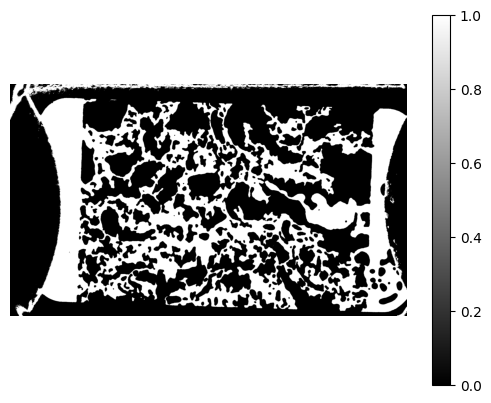

In [5]:
def is_fluid(pixel: tuple):
    if (pixel[0] > 50 and pixel[0] < 240 and pixel[1] > 30 and pixel[1] < 220 and pixel[2] >= 0 and pixel[2] < 80):
        return True
    return False

def fluid_mask(img: np.ndarray):
    mask = np.zeros([1509, 2580])
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel = img[i, j, :]
            if(is_fluid(pixel)):
                mask[i, j] = 1
            else:
                mask[i, j] = 0
    return mask



img_array = np.array(img)
mask = fluid_mask(img_array)

# Plot the image
plt.imshow(mask, cmap='gray')  # Use cmap='gray' for grayscale
plt.colorbar()  # Optional: shows intensity scale
plt.axis('off')  # Hide axes
plt.show()